In [5]:
#import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt
#import plotly

import warnings
warnings.filterwarnings('ignore')

In [6]:
#Get the csv data here and print the head
df = pd.read_csv('https://raw.githubusercontent.com/training-ml/Files/main/breast%20cancer.csv',index_col=0)
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
id,,,,,,,,,,,,,,,,,,,,,
842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [7]:
#print summary
print('Shape------>', df.shape)
print('Each column and data type and its count','\n')
print(df.info())

Shape------> (569, 32)
Each column and data type and its count 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 569 entries, 842302 to 92751
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimete

In [8]:
df = df.drop(['Unnamed: 32'], axis=1)

In [9]:
df.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [10]:
df.isnull().sum()

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [11]:
df.diagnosis.value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

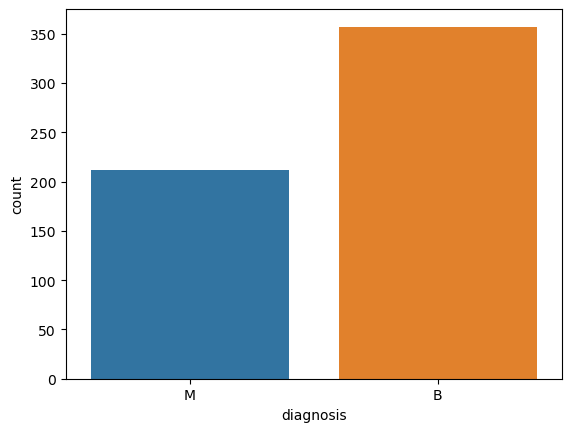

In [12]:
#plot each class frequency
sns.countplot(x='diagnosis', data = df)
plt.show()

In [13]:
df.shape

(569, 31)

In [14]:
from sklearn.feature_selection import SelectKBest, f_classif

In [15]:
#Replace label column (diagnosis) into binary codes
df['diagnosis']=df['diagnosis'].replace({'M':1,'B':0})

In [16]:
x=df.drop('diagnosis',axis=1)
y=df.diagnosis

In [17]:
best_features = SelectKBest(score_func=f_classif,k=17)

fit = best_features.fit(x,y)

df_scores = pd.DataFrame(fit.scores_)

df_columns = pd.DataFrame(x.columns)

#concatenate dataframes
feature_scores = pd.concat([df_columns,df_scores],axis=1)

feature_scores.columns = ['Feature name', 'Score'] #name output columns

print(feature_scores.nlargest(17,'Score')) #print 17 best features

            Feature name       Score
27  concave points_worst  964.385393
22       perimeter_worst  897.944219
7    concave points_mean  861.676020
20          radius_worst  860.781707
2         perimeter_mean  697.235272
23            area_worst  661.600206
0            radius_mean  646.981021
3              area_mean  573.060747
6         concavity_mean  533.793126
26       concavity_worst  436.691939
5       compactness_mean  313.233079
25     compactness_worst  304.341063
10             radius_se  268.840327
12          perimeter_se  253.897392
13               area_se  243.651586
21         texture_worst  149.596905
24      smoothness_worst  122.472880


In [18]:
new_X = df[['concave points_worst','perimeter_worst','concave points_mean','radius_worst','perimeter_mean','area_worst','radius_mean','concave points_worst','perimeter_worst','concave points_mean','radius_worst','perimeter_mean','area_worst','radius_mean','area_mean','concavity_mean','concavity_worst','compactness_mean','compactness_worst','radius_se','perimeter_se','area_se','texture_worst','smoothness_worst']]

In [19]:
new_X

,concave points_worst,perimeter_worst,concave points_mean,radius_worst,perimeter_mean,area_worst,radius_mean,concave points_worst,perimeter_worst,concave points_mean,...,area_mean,concavity_mean,concavity_worst,compactness_mean,compactness_worst,radius_se,perimeter_se,area_se,texture_worst,smoothness_worst
id,,,,,,,,,,,,,,,,,,,,,
842302,0.2654,184.60,0.14710,25.380,122.80,2019.0,17.99,0.2654,184.60,0.14710,...,1001.0,0.30010,0.7119,0.27760,0.66560,1.0950,8.589,153.40,17.33,0.16220
842517,0.1860,158.80,0.07017,24.990,132.90,1956.0,20.57,0.1860,158.80,0.07017,...,1326.0,0.08690,0.2416,0.07864,0.18660,0.5435,3.398,74.08,23.41,0.12380
84300903,0.2430,152.50,0.12790,23.570,130.00,1709.0,19.69,0.2430,152.50,0.12790,...,1203.0,0.19740,0.4504,0.15990,0.42450,0.7456,4.585,94.03,25.53,0.14440
84348301,0.2575,98.87,0.10520,14.910,77.58,567.7,11.42,0.2575,98.87,0.10520,...,386.1,0.24140,0.6869,0.28390,0.86630,0.4956,3.445,27.23,26.50,0.20980
84358402,0.1625,152.20,0.10430,22.540,135.10,1575.0,20.29,0.1625,152.20,0.10430,...,1297.0,0.19800,0.4000,0.13280,0.20500,0.7572,5.438,94.44,16.67,0.13740
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
926424,0.2216,166.10,0.13890,25.450,142.00,2027.0,21.56,0.2216,166.10,0.13890,...,1479.0,0.24390,0.4107,0.11590,0.21130,1.1760,7.673,158.70,26.40,0.14100
926682,0.1628,155.00,0.09791,23.690,131.20,1731.0,20.13,0.1628,155.00,0.09791,...,1261.0,0.14400,0.3215,0.10340,0.19220,0.7655,5.203,99.04,38.25,0.11660
926954,0.1418,126.70,0.05302,18.980,108.30,1124.0,16.60,0.1418,126.70,0.05302,...,858.1,0.09251,0.3403,0.10230,0.30940,0.4564,3.425,48.55,34.12,0.11390


In [20]:
new_X.describe()

,concave points_worst,perimeter_worst,concave points_mean,radius_worst,perimeter_mean,area_worst,radius_mean,concave points_worst,perimeter_worst,concave points_mean,...,area_mean,concavity_mean,concavity_worst,compactness_mean,compactness_worst,radius_se,perimeter_se,area_se,texture_worst,smoothness_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,0.114606,107.261213,0.048919,16.269190,91.969033,880.583128,14.127292,0.114606,107.261213,0.048919,...,654.889104,0.088799,0.272188,0.104341,0.254265,0.405172,2.866059,40.337079,25.677223,0.132369
std,0.065732,33.602542,0.038803,4.833242,24.298981,569.356993,3.524049,0.065732,33.602542,0.038803,...,351.914129,0.079720,0.208624,0.052813,0.157336,0.277313,2.021855,45.491006,6.146258,0.022832
min,0.000000,50.410000,0.000000,7.930000,43.790000,185.200000,6.981000,0.000000,50.410000,0.000000,...,143.500000,0.000000,0.000000,0.019380,0.027290,0.111500,0.757000,6.802000,12.020000,0.071170
25%,0.064930,84.110000,0.020310,13.010000,75.170000,515.300000,11.700000,0.064930,84.110000,0.020310,...,420.300000,0.029560,0.114500,0.064920,0.147200,0.232400,1.606000,17.850000,21.080000,0.116600
50%,0.099930,97.660000,0.033500,14.970000,86.240000,686.500000,13.370000,0.099930,97.660000,0.033500,...,551.100000,0.061540,0.226700,0.092630,0.211900,0.324200,2.287000,24.530000,25.410000,0.131300
75%,0.161400,125.400000,0.074000,18.790000,104.100000,1084.000000,15.780000,0.161400,125.400000,0.074000,...,782.700000,0.130700,0.382900,0.130400,0.339100,0.478900,3.357000,45.190000,29.720000,0.146000
max,0.291000,251.200000,0.201200,36.040000,188.500000,4254.000000,28.110000,0.291000,251.200000,0.201200,...,2501.000000,0.426800,1.252000,0.345400,1.058000,2.873000,21.980000,542.200000,49.540000,0.222600


In [21]:
scalar=StandardScaler()
x_scalar = scalar.fit_transform(new_X)

In [22]:
x_train,x_test,y_train,y_test = train_test_split(x_scalar,y,test_size = 0.25, random_state=355)

In [23]:
#Write one function and call as many times to check accuracy score of different models

def metric_score(clf,x_train,x_test,y_train,y_test, train=True):
    if train:
        y_pred = clf.predict(x_train)
        
        print('\n=============Train result==========')
        
        print(f'Accuracy score:  {accuracy_score(y_train,y_pred)*100:.2f}%')
        
    elif train == False:
        pred = clf.predict(x_test)
        
        print('\n=============Test result===========')
        
        print(f'Accuracy score:  {accuracy_score(y_test,pred)*100:.2f}%')
        
        print('\n \n Test classification report \n', classification_report(y_test, pred, digits = 2)) #Model confidence/accuracy

In [24]:
#Initiate KNeighbors Classifier
knn = KNeighborsClassifier()

#Model Training
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [25]:
#call the function and pass dataset to check train and test score
metric_score(knn,x_train,x_test,y_train,y_test,train=True) #This is for training score

metric_score(knn,x_train,x_test,y_train,y_test,train=False) #This is for testing score


=============Train result==========
Accuracy score:  98.59%

=============Test result===========
Accuracy score:  95.80%

 
 Test classification report 
               precision    recall  f1-score   support

           0       0.96      0.98      0.97        93
           1       0.96      0.92      0.94        50

    accuracy                           0.96       143
   macro avg       0.96      0.95      0.95       143
weighted avg       0.96      0.96      0.96       143



In [26]:
from sklearn.model_selection import KFold, cross_val_score

In [27]:
k_f = KFold(n_splits=3)
k_f

KFold(n_splits=3, random_state=None, shuffle=False)

In [28]:
for train, test in k_f.split([12,23,35,46,51,63,75,86,96,108]):
    print ('train: ',train,'test: ', test)

train:  [4 5 6 7 8 9] test:  [0 1 2 3]
train:  [0 1 2 3 7 8 9] test:  [4 5 6]
train:  [0 1 2 3 4 5 6] test:  [7 8 9]


In [29]:
cross_val_score(knn,x_scalar,y,cv=5)

array([0.94736842, 0.96491228, 0.98245614, 0.98245614, 0.97345133])

In [30]:
cross_val_score(knn,x_scalar,y,cv=5).mean()

0.9701288619779536

In [ ]:
Inorder to fix this there has to be a technique used for variance bias handoff which is Hyperparameter tuning

In [31]:
from sklearn.model_selection import GridSearchCV

In [40]:
param_grid = {'algorithm':['kd_tree','brute'],
             'leaf_size':[3,5,6,7,8],
             'n_neighbors':[3,5,7,9,11,13]
             }

In [41]:
gridsearch = GridSearchCV(estimator=knn, param_grid=param_grid)

In [42]:
gridsearch.fit(x_train,y_train)

GridSearchCV(estimator=KNeighborsClassifier(algorithm='kd_tree', leaf_size=3,
                                            n_neighbors=3),
             param_grid={'algorithm': ['kd_tree', 'brute'],
                         'leaf_size': [3, 5, 6, 7, 8],
                         'n_neighbors': [3, 5, 7, 9, 11, 13]})

In [43]:
gridsearch.best_score_

0.9742270861833106

In [44]:
gridsearch.best_estimator_

KNeighborsClassifier(algorithm='kd_tree', leaf_size=3, n_neighbors=3)

In [45]:
#we will use the best parameters in our knn algorithm and check if accuracy is increasing
knn = KNeighborsClassifier(algorithm = 'kd_tree', leaf_size=3,n_neighbors=3)
knn.fit(x_train,y_train)

KNeighborsClassifier(algorithm='kd_tree', leaf_size=3, n_neighbors=3)

In [46]:
#call the function and pass dataset to check train and test score
metric_score(knn,x_train,x_test,y_train,y_test,train=True) #This is for training score

metric_score(knn,x_train,x_test,y_train,y_test,train=False) #This is for testing score


=============Train result==========
Accuracy score:  98.59%

=============Test result===========
Accuracy score:  95.80%

 
 Test classification report 
               precision    recall  f1-score   support

           0       0.96      0.98      0.97        93
           1       0.96      0.92      0.94        50

    accuracy                           0.96       143
   macro avg       0.96      0.95      0.95       143
weighted avg       0.96      0.96      0.96       143



In [47]:
#if you want to check the confusion matrix you can check
y_pred = knn.predict(x_test) #we are predicting again because variables inside the function are local variables

cfm=confusion_matrix(y_test,y_pred)
cfm


array([[91,  2],
       [ 4, 46]], dtype=int64)